## Задача 1

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
import matplotlib.pyplot as plt

In [3]:
def system1(x, z, alpha):
    u, v = z  ## u=y, v=y'
    du_dx = v
    dv_dx = -(1 - 4*x)*v - 8*u + 5
    return [du_dx, dv_dx]

def shoot1(alpha):
    sol = solve_ivp(system1, [0, 1], [alpha, alpha], args=(alpha,), dense_output=True)
    return sol.sol(1)[0]  # u(1)

# Находим alpha, при котором u(1) = 0
from scipy.optimize import root_scalar

result = root_scalar(shoot1, bracket=[-1, 1])  # Подбираем интервал для alpha
alpha = result.root

# Решение с найденным alpha
sol = solve_ivp(system1, [0, 1], [alpha, alpha], args=(alpha,), dense_output=True)
x_vals = np.linspace(0, 1, 100)
y_vals = sol.sol(x_vals)[0]

print(f"Найденное alpha: {alpha}")

Найденное alpha: 0.9998873047788788


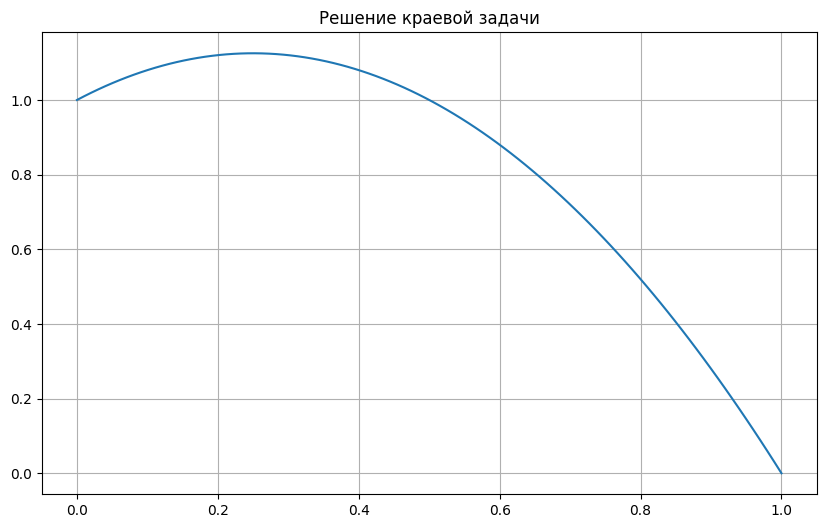

In [4]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals)
plt.grid()
plt.title('Решение краевой задачи')
plt.show()

## Задача 2

In [5]:
def system2(x, z):
    u, v = z  ## u=y, v=y'
    du_dx = v
    dv_dx = -u + x * np.cos(x)
    return [du_dx, dv_dx]

def shoot2(alpha):
    # Начальные условия: u(0) = alpha, v(0) = 3*alpha + 2
    sol = solve_ivp(system2, [0, np.pi/2], [alpha, 3*alpha + 2], dense_output=True)
    u_pi2 = sol.sol(np.pi/2)[0]
    v_pi2 = sol.sol(np.pi/2)[1]
    return v_pi2 + 5*u_pi2 - 2  # Условие: v(pi/2) + 5u(pi/2) - 2 = 0

result = root_scalar(shoot2, bracket=[-1, 1])  # Подбираем интервал для alpha
alpha = result.root

# Решение с найденным alpha
sol = solve_ivp(system2, [0, np.pi/2], [alpha, 3*alpha + 2], dense_output=True)
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = sol.sol(x_vals)[0]
v_pi2 = sol.sol(np.pi/2)[1]
y_pi2 = sol.sol(np.pi/2)[0]

print(f"Найденное alpha: {alpha}")
print(f"y(pi/2): {y_pi2}")
print(f"dy/dx(pi/2): {v_pi2}")

Найденное alpha: -0.7305465521264065
y(pi/2): 0.1753394944804194
dy/dx(pi/2): 1.1233025275979056


In [6]:
y = -0.73*np.cos(x_vals)-0.441*np.sin(x_vals)+0.25*(x_vals**2*np.sin(x_vals)+x_vals*np.cos(x_vals))

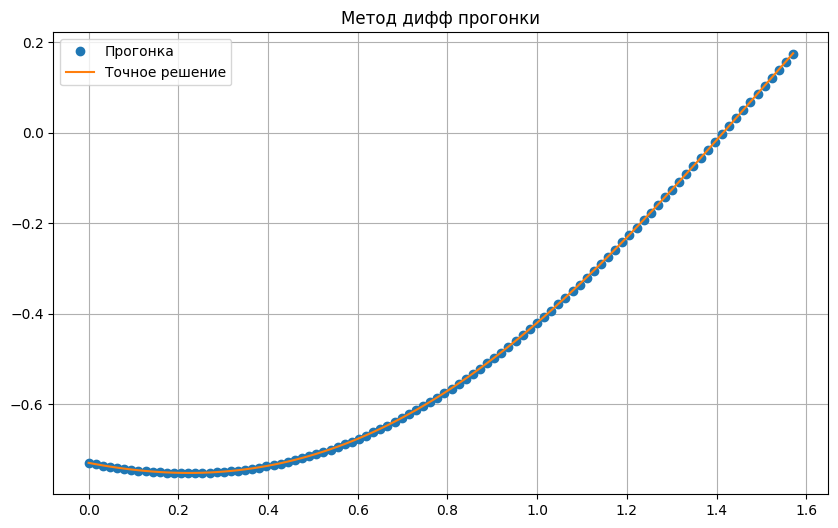

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,'o', x_vals, y, '-')
plt.legend(['Прогонка','Точное решение'])
plt.grid()
plt.title('Метод дифф прогонки')
plt.show()


## Задача 3/4

In [8]:
def n(x):
    return 1 + np.exp(-3 * (x - 5)**2)

def system(x, z):
    phi, psi = z  ##psi=phi'
    dphi_dx = psi
    dpsi_dx = np.exp(phi) - n(x)
    return [dphi_dx, dpsi_dx]

def solve_for_alpha(alpha):
    sol = solve_ivp(system, [0, 10], [0, alpha], method='Radau', t_eval=[10], dense_output=True)
    return sol.sol(10)[0]  # phi(10)

def newton_shooting(alpha_start, tol=1e-10, max_iter=100):
    alpha = alpha_start  # Начальное предположение
    for i in range(max_iter):
        F = solve_for_alpha(alpha)
        if abs(F) < tol:  ## Ищем так, чтобы phi(10)=0, если ошибка больше, то по Ньютону
            print(f"Решение найдено за {i} итераций.")
            return alpha
        
        # Численное вычисление производной F'(alpha)
        h = 1e-8
        F_plus = solve_for_alpha(alpha + h)
        F_minus = solve_for_alpha(alpha - h)
        F_prime = (F_plus - F_minus) / (2 * h)
        
        alpha = alpha - 0.7*F / F_prime
    
    return alpha

# Находим alpha
#alpha = newton_shooting()

# Решение с найденным alpha
#sol = solve_ivp(system, [0, 10], [0, alpha], method='Radau', dense_output=True)
#x_vals = np.linspace(0, 10, 100)
#phi_vals = sol.sol(x_vals)[0]

#print(f"Найденное alpha: {alpha}")

Метод очень долго не сходился..., поэтому было решено построить график невязки в зависимости от альфы, и подогнать альфу сразу ближе к решению

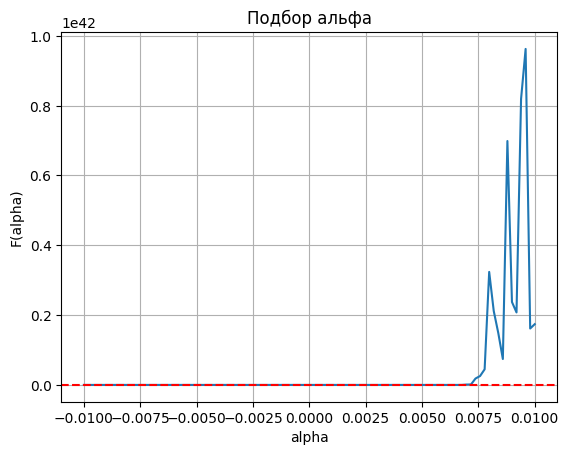

In [14]:
alphas = np.linspace(-0.01, 0.01, 100)
F_values = [solve_for_alpha(a) for a in alphas]
plt.plot(alphas, F_values)
plt.title('Подбор альфа')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('alpha'); plt.ylabel('F(alpha)')
plt.grid(); plt.show()

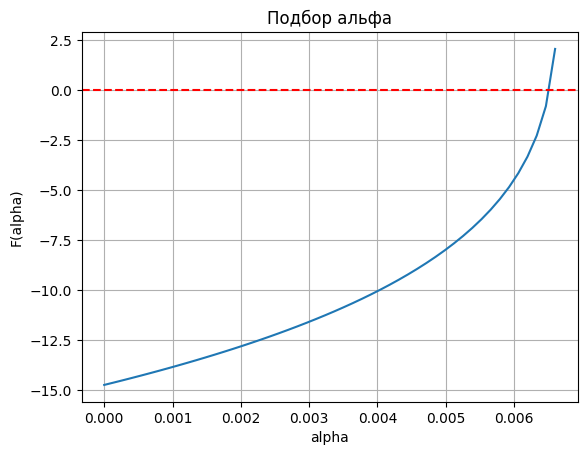

In [15]:
alphas = np.linspace(0, 0.0066, 50)
F_values = [solve_for_alpha(a) for a in alphas]
plt.plot(alphas, F_values)
plt.title('Подбор альфа')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('alpha'); plt.ylabel('F(alpha)')
plt.grid(); plt.show()

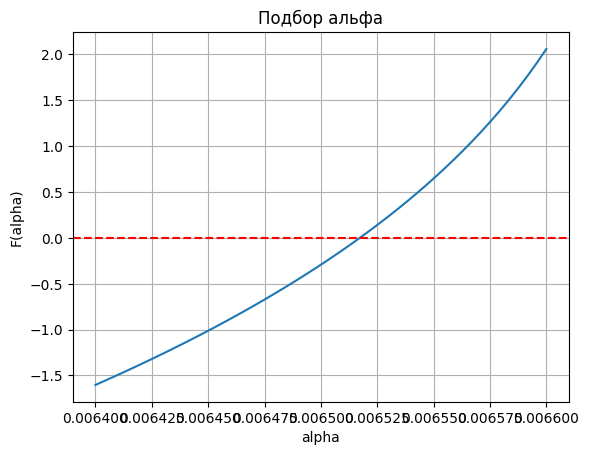

In [16]:
alphas = np.linspace(0.0064, 0.0066, 50)
F_values = [solve_for_alpha(a) for a in alphas]
plt.plot(alphas, F_values)
plt.title('Подбор альфа')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('alpha'); plt.ylabel('F(alpha)')
plt.grid(); plt.show()

In [12]:
# Находим alpha
alpha = newton_shooting(0.006512)

# Решение с найденным alpha
sol = solve_ivp(system, [0, 10], [0, alpha], method='Radau', dense_output=True)
x_vals = np.linspace(0, 10, 100)
phi_vals = sol.sol(x_vals)[0]

print(f"Найденное alpha: {alpha}")

Решение найдено за 19 итераций.
Найденное alpha: 0.006517406126965981


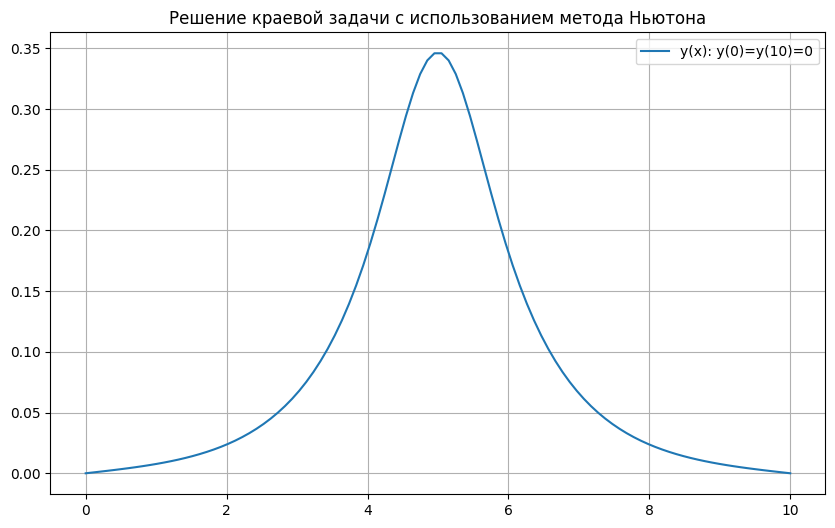

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,phi_vals)
plt.legend(['y(x): y(0)=y(10)=0'])
plt.title('Решение краевой задачи с использованием метода Ньютона')
plt.grid()
plt.show()

Что интересно, что при нулевом условии для производной в нуле, решение выглядит совсем иначе (см.hw-5 #8), здесь же мы получили производную в нуле =0.0065 (как бы заменяя условие на правой границей задачей Коши в нуле), и решение значительно изменилось